# Análisis predictivo con Machine Learning 🔮

<strong>Objetivos:</strong>

+ Crear una columna para <strong>class</strong>.
+ Estandarizar los datos.
+ Dividir los datos en datos de entrenamiento y datos de prueba.
+ Encontrar los mejores hiperparámetros para los siguientes modelos: <strong>regresión logística</strong>, <strong>SVM</strong>, <strong>árbol de clasificación</strong> y <strong>KNN</strong>.
+ Encontrar el modelo que mejor funciona usando los datos de prueba.

---

## Importar librerías y definir funciones auxiliares

In [1]:
# Importar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Para ignorar warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Función auxiliar para trazar una matriz de confusión.
def plot_confusion_matrix(y, y_predict):
    'this function plots the confusion matrix'
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Matriz de confusión'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
# Cargar dataset de Space X provisto por IBM.
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')

''' 
o cargar dataset obtenido en el tercer cuaderno.
data = pd.read_csv('./datasets/dataset_part_3.csv')
data.head()
'''

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
# Cargar dataset de Space X provisto por IBM.
x = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

''' 
o cargar dataset obtenido en el quinto cuaderno.
x = pd.read_csv('./datasets/dataset_part_4.csv')
x.head()
'''

x.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Tareas

### Tarea 1: Crear una matriz NumPy con la variable <code>class</code>

Crear una matriz NumPy a partir de la columna <code>class</code> del DataFrame <code>datos</code>, aplicando el método <code>to_numpy()</code> y luego asígnarla a la variable <code>y</code>. La salida debe ser una serie de Pandas (solo un corchete <code>df['name of column']</code>).

In [5]:
y = data['Class'].to_numpy()

### Tarea 2: Estandarizar los datos del DataFrame <code>x</code> y luego reasignarlos a la misma variable

Utilizar la transformación proporcionada a continuación:

In [6]:
transform = preprocessing.StandardScaler()

In [7]:
x_scaled = transform.fit_transform(x)

x = pd.DataFrame(x_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-1.712912,-1.948145e-16,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,1.812654,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,-0.106,-0.106,1.527525,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,5.385165,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,5.385165,-0.215666,-0.185695,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,5.385165,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306


Ahora hay que dividir los datos en datos de entrenamiento y datos de prueba usando la función <code>train_test_split</code>. A su vez, los datos de entrenamiento se dividen en datos de validación, un segundo conjunto utilizado para los datos de entrenamiento; luego se entrenaran los modelos y se seleccionaran los mejores hiperparámetros usando la función <code>GridSearchCV</code>.

### Tarea 3: Dividir los datos <code>x</code> e <code>y</code> en datos de entrenamiento y prueba

Utilizar la función <code>train_test_split</code> y establecer el parámetro test_size en 0.2 y random_state en 2.

Los datos de entrenamiento y de prueba deben asignarse a las siguientes etiquetas:

<code>X_train, X_test, Y_train, Y_test</code>.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [9]:
Y_test.shape

(18,)

Como se puede ver, hay 18 muestras de prueba.

### Tarea 4: Crear un objeto de regresión logística y luego un objeto GridSearchCV llamado logreg_cv con cv=10. Ajustar el objeto para encontrar los mejores parámetros del diccionario de parámetros

In [10]:
# Diccionario de parámetros.
parameters = {
    'C':[0.01, 0.1, 1],
    'penalty':['l2'],
    'solver':['lbfgs']
    }

# Crear un objeto de regresión logística.
lr = LogisticRegression()

# Crear un objeto GridSearchCV con cv=10.
logreg_cv = GridSearchCV(lr, parameters, cv=10)
'''
lr: el regresor que se pasa como estimador, en función del cual se evaluan los hiperparámetros.
parameters: diccionario de hiperparámetros.
cv: número de validación cruzada que tiene para probar cada combinación seleccionada de hiperparámetros.
'''

# Ajustar el modelo a los datos de entrenamiento.
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

En resumen, el código de arriba está buscando los mejores parámetros para un modelo de regresión logística usando GridSearchCV. 

In [11]:
# Mostrar los mejores parámetros obtenidos con best_params_.
print('Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes:', logreg_cv.best_params_)
# Mostrar la precisión de la validación de datos con best_score_.
print('Precisión:', logreg_cv.best_score_)

Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Precisión: 0.8464285714285713


### Tarea 5: Calcular la precisión de logreg_cv en los datos de prueba utilizando el método <code>score</code>

In [12]:
methods = []
accuracy = []

methods.append('Regresion logística')
accuracy.append(logreg_cv.score(X_test, Y_test))

print('Precisión de los datos de prueba:' ,logreg_cv.score(X_test, Y_test))

Precisión de los datos de prueba: 0.8333333333333334


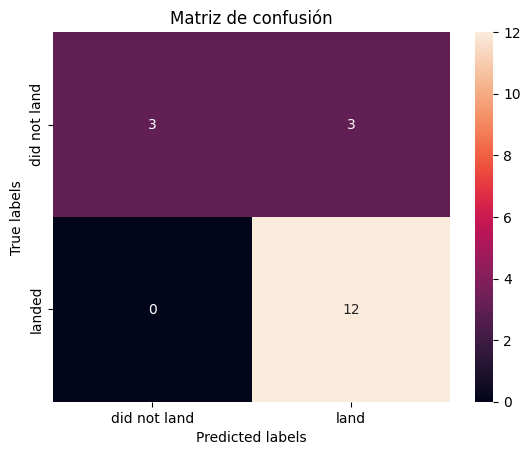

In [13]:
# Representar los resultados de la predicción en una matriz de confusión:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

La matriz de confusión es una herramienta para visualizar los resultados de una predicción y ver cómo se relacionan los resultados reales con los resultados predichos.

Al examinar la matriz de confusión, se puede ver que la regresión logística puede distinguir entre las diferentes clases. Pero hay un gran problema con los falsos positivos.

### Tarea 6: Crear un objeto SVC y luego un objeto GridSearchCV llamado svm_cv con cv=10. Ajustar el objeto para encontrar los mejores parámetros del diccionario de parámetros

In [14]:
# Diccionario de parámetros.
parameters = {
    'kernel': ('linear', 'rbf','poly','rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)
    }

# Crear objeto SVC.
svm = SVC()

# Crear objeto GridSearchCV con cv=10.
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento.
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [15]:
# Mostrar los mejores parámetros obtenidos con best_params_.
print('Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes:', svm_cv.best_params_)
# Mostrar la precisión de la validación de datos con best_score_.
print('Precisión:', svm_cv.best_score_)

Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Precisión: 0.8482142857142856


### Tarea 7:  Calcular la precisión de svm_cv en los datos de prueba utilizando el método <code>score</code>

In [16]:
methods.append('Support vector machine')
accuracy.append(svm_cv.score(X_test, Y_test))

print('Precisión de los datos de prueba:', svm_cv.score(X_test, Y_test))

Precisión de los datos de prueba: 0.8333333333333334


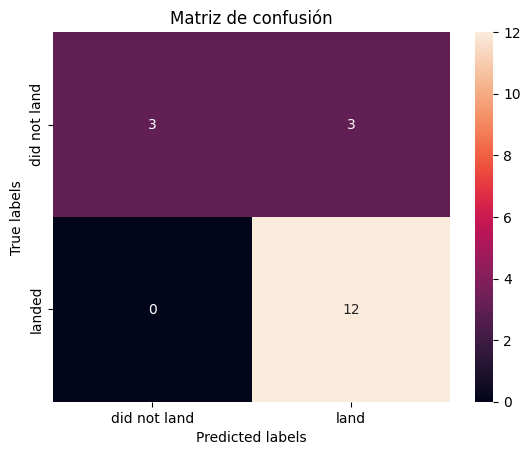

In [17]:
# Representar los resultados de una predicción en una matriz de confusión:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### Tarea 8: Crear un objeto de arbol de clasificación y luego un objeto GridSearchCV llamado tree_cv con cv=10. Ajustar el objeto para encontrar los mejores parámetros del diccionario de parámetros

In [18]:
# Diccionario de parámetros.
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
    }

# Crear objeto de arbol de clasificación.
tree = DecisionTreeClassifier()

# Crear objeto GridSearchCV con cv=10.
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento.
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [19]:
# Mostrar los mejores parámetros obtenidos con best_params_.
print('Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes:', tree_cv.best_params_)
# Mostrar la precisión de la validación de datos con best_score_.
print('Precisión:', tree_cv.best_score_)

Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Precisión: 0.875


### Tarea 9: Calcular la precisión de tree_cv en los datos de prueba utilizando el método <code>score</code>

In [20]:
methods.append('Arbol de clasificación')
accuracy.append(tree_cv.score(X_test, Y_test))

print('Precisión de los datos de prueba:', tree_cv.score(X_test, Y_test))

Precisión de los datos de prueba: 0.8333333333333334


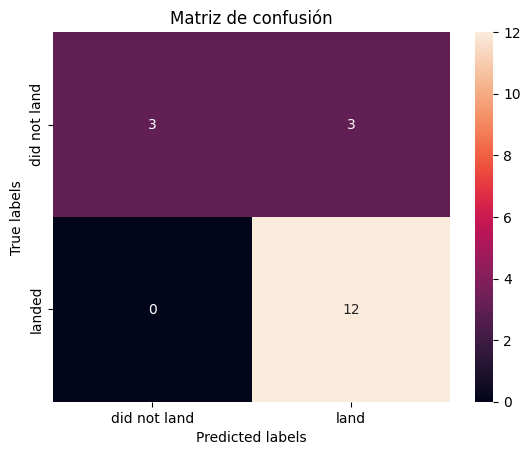

In [21]:
# Representar los resultados de una predicción en una matriz de confusión:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### Tarea 10: Crear un objeto KNN y luego un objeto GridSearchCV llamado knn_cv con cv=10. Ajustar el objeto para encontrar los mejores parámetros del diccionario de parámetros

In [22]:
# Diccionario de parámetros.
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
    }

# Crear objeto KNN.
KNN = KNeighborsClassifier()

# Crear objeto GridSearchCV con cv=10.
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento.
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [23]:
# Mostrar los mejores parámetros obtenidos con best_params_.
print('Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes:', knn_cv.best_params_)
# Mostrar la precisión de la validación de datos con best_score_.
print('Precisión:', knn_cv.best_score_)

Los hiperparámetros más óptimos que se obtuvieron fueron los siguientes: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Precisión: 0.8482142857142858


### Tarea 11: Calcular la precisión de knn_cv en los datos de prueba utilizando el método <code>score</code>

In [24]:
methods.append('K vecinos más cercanos')
accuracy.append(knn_cv.score(X_test, Y_test))

print('Precisión de los datos de prueba:', knn_cv.score(X_test, Y_test))

Precisión de los datos de prueba: 0.8333333333333334


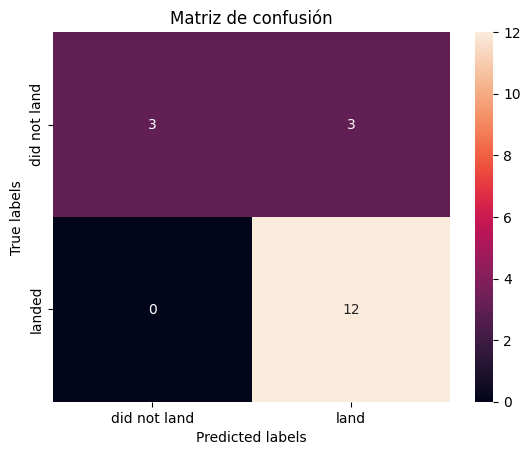

In [25]:
# Representar los resultados de una predicción en una matriz de confusión:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### Tarea 12: Encontrar el modelo que mejor funciona

In [26]:
# Ver métodos / algoritmos / modelo
print(methods)
# Ver precisiones.
print(accuracy)

['Regresion logística', 'Support vector machine', 'Arbol de clasificación', 'K vecinos más cercanos']
[0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


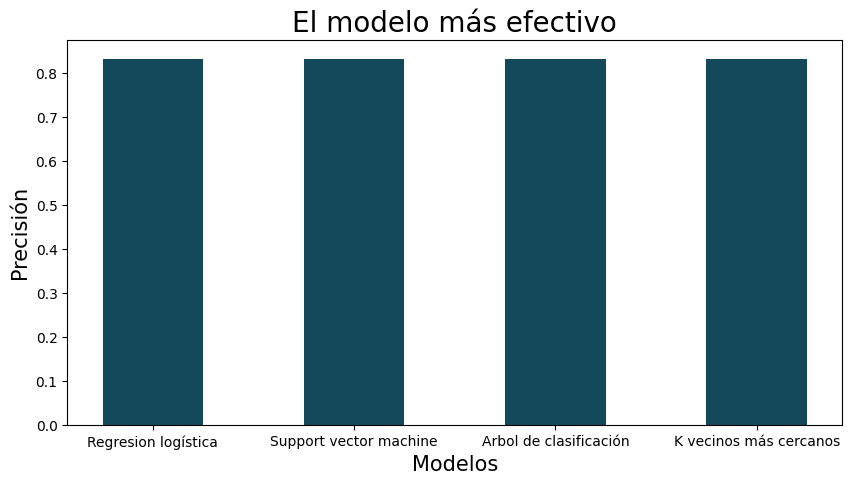

In [27]:
# Graficar.
fig = plt.figure(figsize=(10, 5))
plt.bar(methods, accuracy, color='#14495C', width=0.5)
plt.xlabel('Modelos', fontsize=15)
plt.ylabel('Precisión', fontsize=15)
plt.title('El modelo más efectivo', fontsize=20)
plt.show()

Todos los modelos tienen prácticamente la misma precisión en el conjunto de prueba: 83, 33%. Esto significa que los modelos tienen la misma capacidad para predecir correctamente la clase a la que pertenece una muestra en el conjunto de datos de prueba. Esto puede deberse a varias razones,
como que los modelos son muy similares en términos de su arquitectura y parámetros, o que el conjunto de datos de prueba es muy fácil de clasificar. Sin embargo, no necesariamente significa que los modelos sean igualmente buenos en general, ya que pueden tener diferentes habilidades en conjuntos de datos diferentes o en situaciones diferentes.

## Resumen

El desarrollo de este cuaderno puede resumirse en los siguientes puntos:

+ El primer paso fue importar las librerías, definir una función auxiliar para trazar matrices de confusión, y cargar dos datasets de Space X: el primer DataFrame con nombre <code>datos</code> y el segundo con nombre <code>x</code>.
+ A partir del DataFrame <code>datos</code> se creo una matriz numpy con la variable <code>class</code> (contiene los resultados de los lanzamientos: 0 si han fracasado, 1 si han tenido éxito). Esta matriz se asignó a una variable llamada <code>y</code>.
+ Se estandarizó el DataFrame <code>x</code> y se dividieron los datos en datos de entrenamiento y prueba usando la función <code>train_test_split</code>.
+ De la tarea 4 a la 11, se buscaron los mejores hiperparámetros para los siguientes modelos: regresión logística, SVC, árbol de clasificación y KNN. Todo esto usando GridSearchCV. Luego se evaluó y calculó la precisión de estos modelos sobre los datos de prueba.
+ Finalmente se evaluó cuál es el mejor modelo a partir de la comparación de sus resultados, que se representó con un gráfico de barras.

---